In [55]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()


%matplotlib inline

In [57]:
# load the data

X_train = pd.read_csv("data/russian_house_market/train.csv", parse_dates=['timestamp'])
X_test = pd.read_csv("data/russian_house_market/test.csv")

In [58]:
X_train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [59]:
# correlation with target feature

corr_matrix = X_train.corr()
corr_matrix["price_doc"].sort_values(ascending=False)

price_doc                     1.000000
num_room                      0.476337
full_sq                       0.341840
sport_count_5000              0.294864
sport_count_3000              0.290651
trc_count_5000                0.289371
sport_count_2000              0.278056
office_sqm_5000               0.269977
trc_sqm_5000                  0.268072
sport_count_1500              0.258376
sport_objects_raion           0.252794
trc_count_3000                0.242068
cafe_count_5000_price_1000    0.240464
cafe_count_5000_price_1500    0.232612
cafe_count_5000               0.231546
cafe_count_5000_na_price      0.230055
cafe_count_5000_price_500     0.226952
office_sqm_3000               0.226780
cafe_count_5000_price_2500    0.225566
trc_sqm_3000                  0.225533
office_count_5000             0.219249
office_sqm_2000               0.216495
cafe_count_5000_price_high    0.214327
church_count_5000             0.213275
cafe_count_5000_price_4000    0.210354
leisure_count_5000       

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121b364e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12346f588>]], dtype=object)

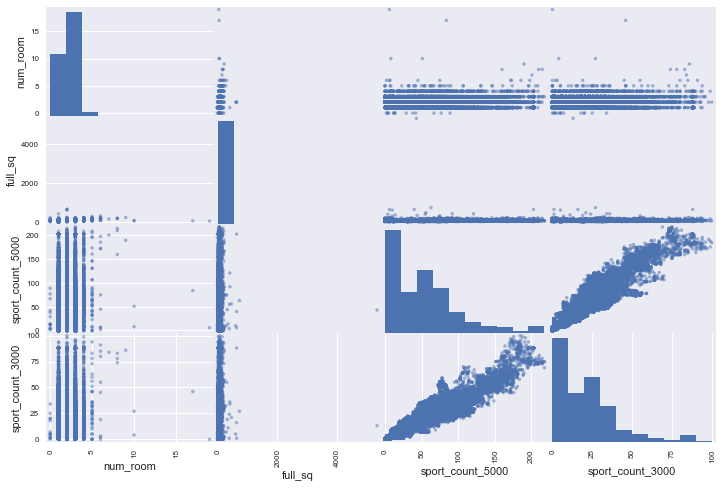

In [63]:
# correlations between most important features

attributes = ["num_room", "full_sq", "sport_count_5000", "sport_count_3000"]
pd.plotting.scatter_matrix(X_train[attributes], figsize=(12,8))

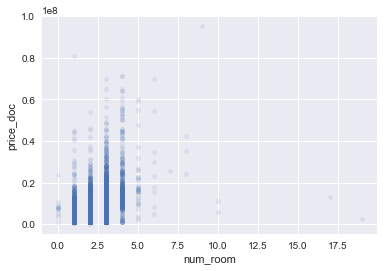

In [63]:
# most interesting is the num_room, so let's plot it against the target feature
# as we can see 

X_train.plot(kind="scatter", x="num_room", y="price_doc", alpha=0.1)

In [64]:
# missing data

train_na = (X_train.isnull().sum() / len(X_train)) * 100 # see the percentage
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False) # drop the ones that are zeros

[<matplotlib.text.Text at 0x12331a358>, <matplotlib.text.Text at 0x123704fd0>]

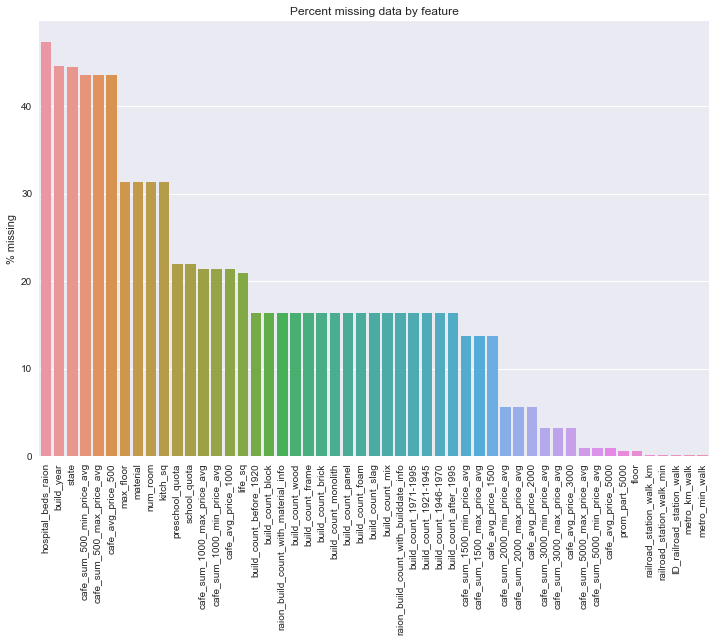

In [65]:
# plot the missing data

f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')

In [66]:
# fill the na and get dummy variables from categorical data

X_all = pd.concat(objs = [X_train, X_test], axis=0)
assert isinstance(X_all, pd.DataFrame)

X_all.fillna(X_all.mean(), inplace = True)
X_all = pd.get_dummies(X_all)

In [53]:
# feature scaling

from sklearn.preprocessing import StandardScaler

X_all = StandardScaler().fit_transform(X_all)

In [68]:
# split the data

X_train = X_all[:len(X_train)]
X_test = X_all[len(X_train):]

y = X_train["price_doc"]
X_train = X_train.drop(["price_doc"], axis = 1).copy()

In [ ]:
X_matrix = X_train.as_matrix()
y_matrix = y.as_matrix()

In [69]:
# extreme gradient boosting

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y)

/Users/claudiucreanga/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# test it with linear regression

from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y)

In [ ]:
# display all scores in one go

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, **options):
    plt.plot(fpr, tpr, linewidth=2, **options)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
def display_all_scores(model, X):
    y_train_predictions = cross_val_predict(model, X, y_matrix, cv = 3)
    print("Scores for model:",model.__class__.__name__)
    print("Confusion metrics:", confusion_matrix(y_matrix, y_train_predictions))
    print("Precision score:", precision_score(y_matrix, y_train_predictions))
    print("Recall score:", recall_score(y_matrix, y_train_predictions))
    print("F1 score:", f1_score(y_matrix, y_train_predictions))


In [ ]:
display_all_scores(lr_clf, X_matrix)